# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Loading The Data

In [2]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

#removing columns that we are not interested in train and test data
train.drop(columns = ['talk_time'], inplace = True)
test.drop(columns = ['id', 'talk_time'], inplace = True)

# EDA

In [3]:
#first 5 rows
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1,1,0,1


In [4]:
#shape of the data
train.shape

(2000, 20)

In [5]:
#data types of the columns
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
#statistical information about the data
train.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
#number of nulls in each column in train and test datasets
print(train.isnull().sum())
print("----------------------------------------")
print(test.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
----------------------------------------
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [8]:
#information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  three_g        2000 non-null   int64  
 17  touch_screen   2000 non-null   int64  
 18  wifi    

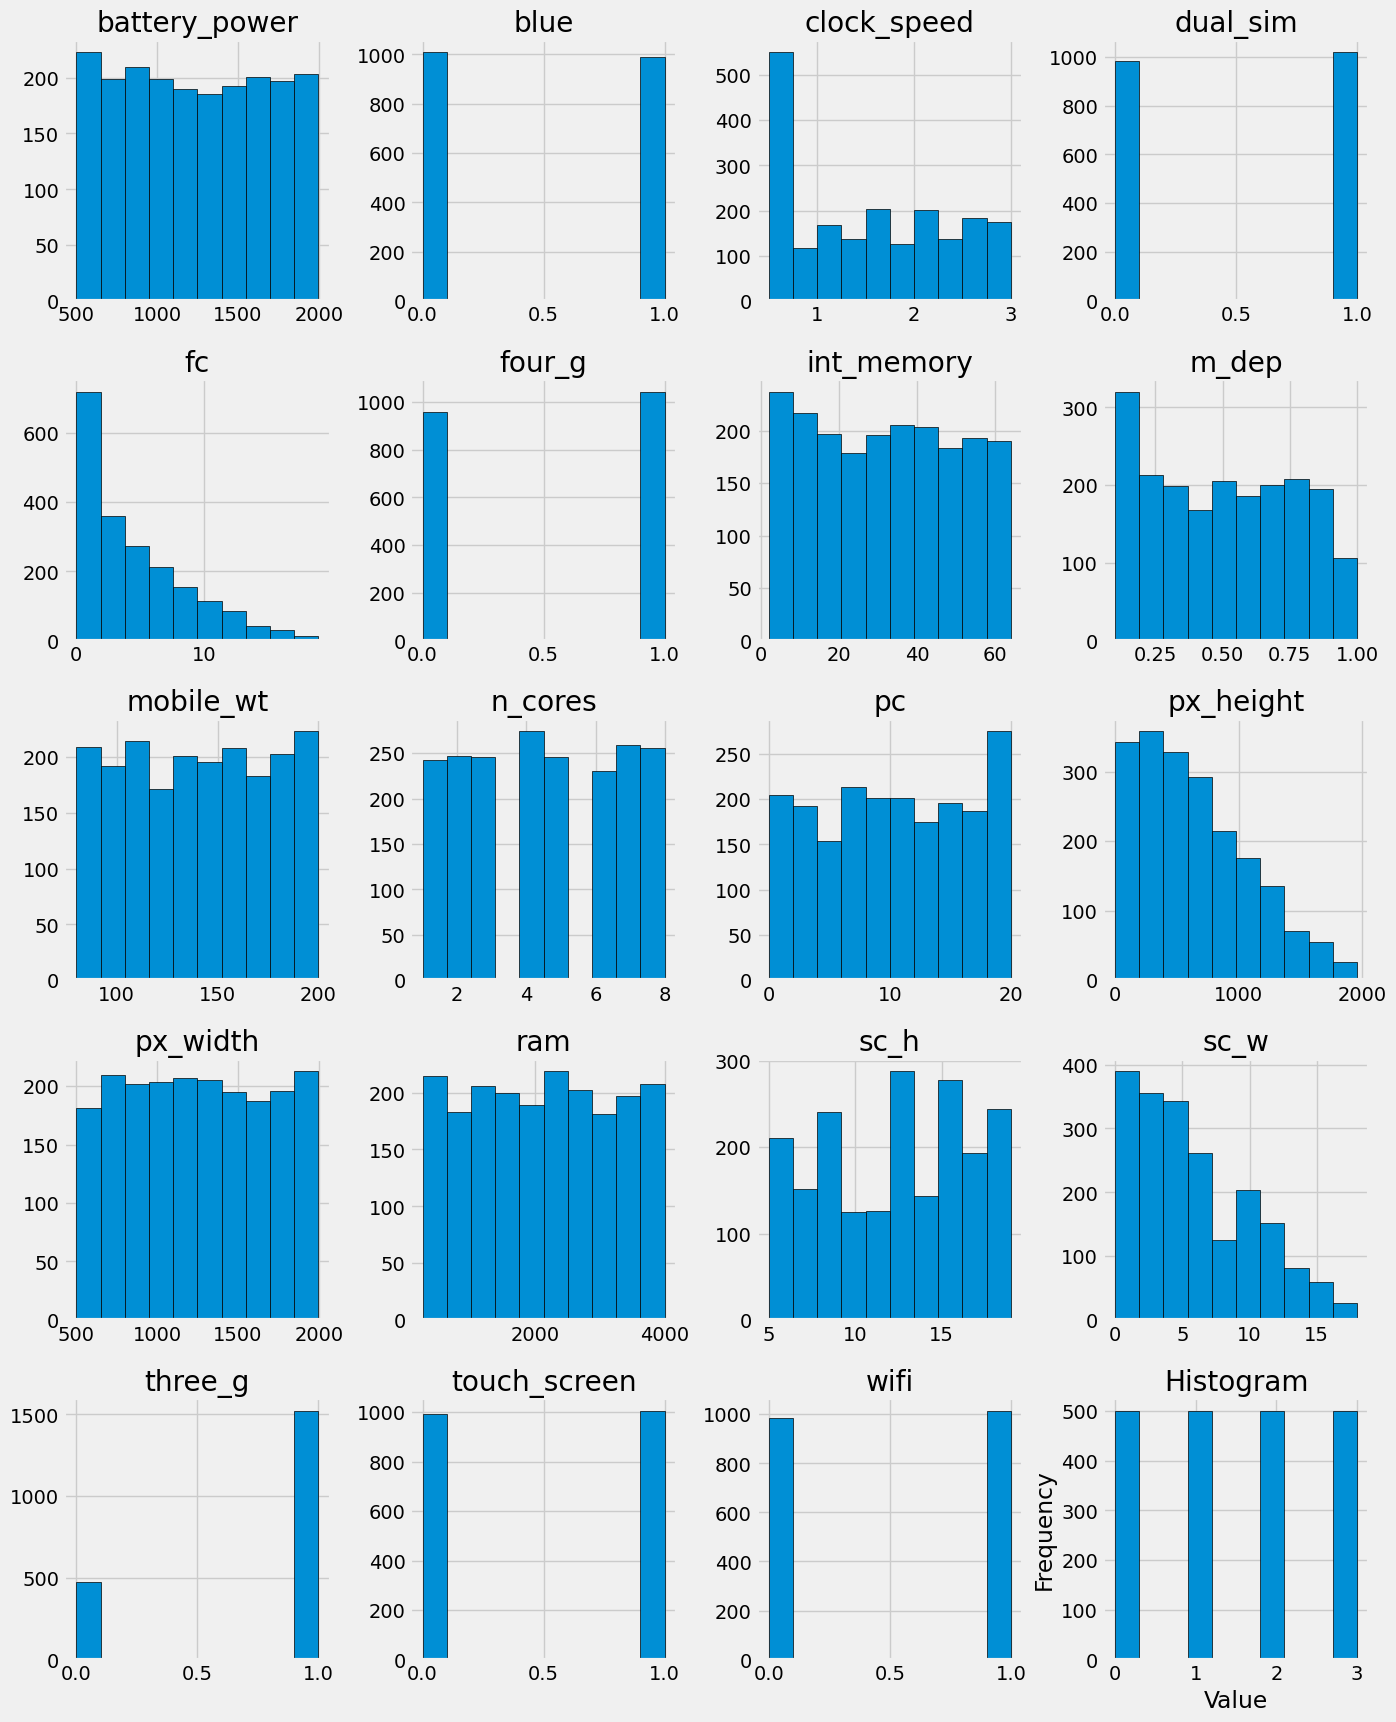

In [9]:
#create histogram
train.hist(bins = 10, edgecolor = 'black', figsize = (15, 20))

#add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

#show plot
plt.show()

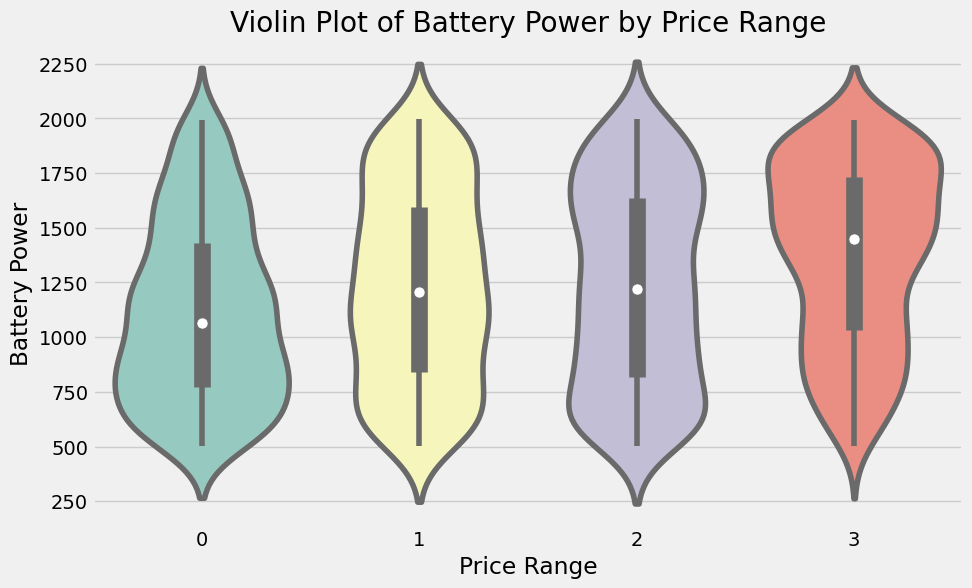

In [10]:
#violin plot of Battery Power by price_range
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'battery_power', data = train, palette = 'Set3')
plt.title('Violin Plot of Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

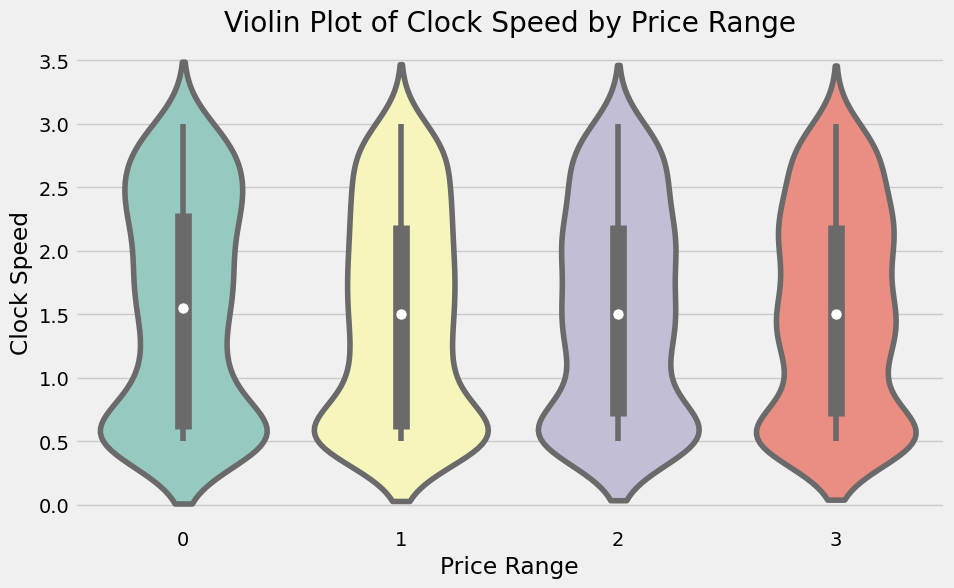

In [11]:
#violin plot of Clock Speed by price_range
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'clock_speed', data = train, palette = 'Set3')
plt.title('Violin Plot of Clock Speed by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Clock Speed')
plt.show()

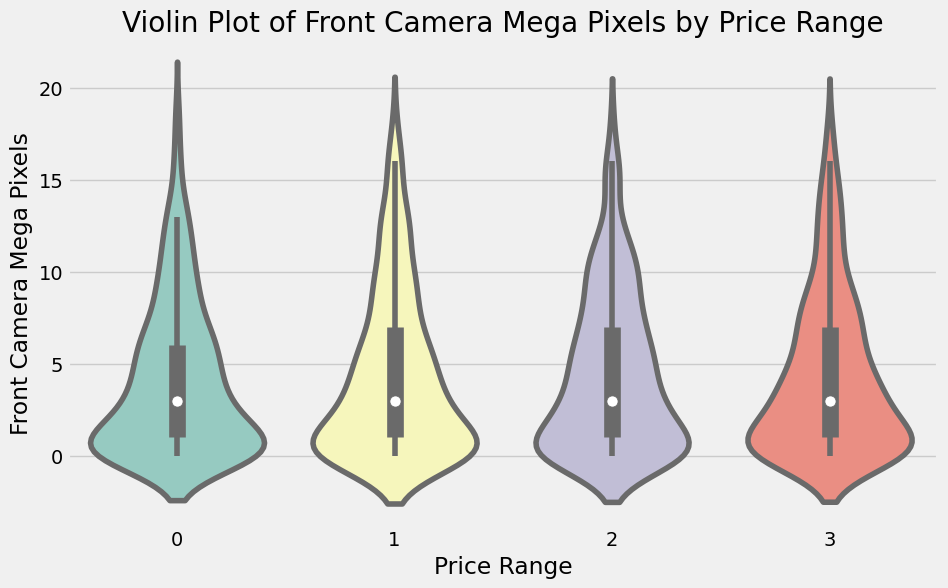

In [12]:
#violin plot of Front Camera Mega Pixels by price_range
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'fc', data = train, palette = 'Set3')
plt.title('Violin Plot of Front Camera Mega Pixels by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Mega Pixels')
plt.show()

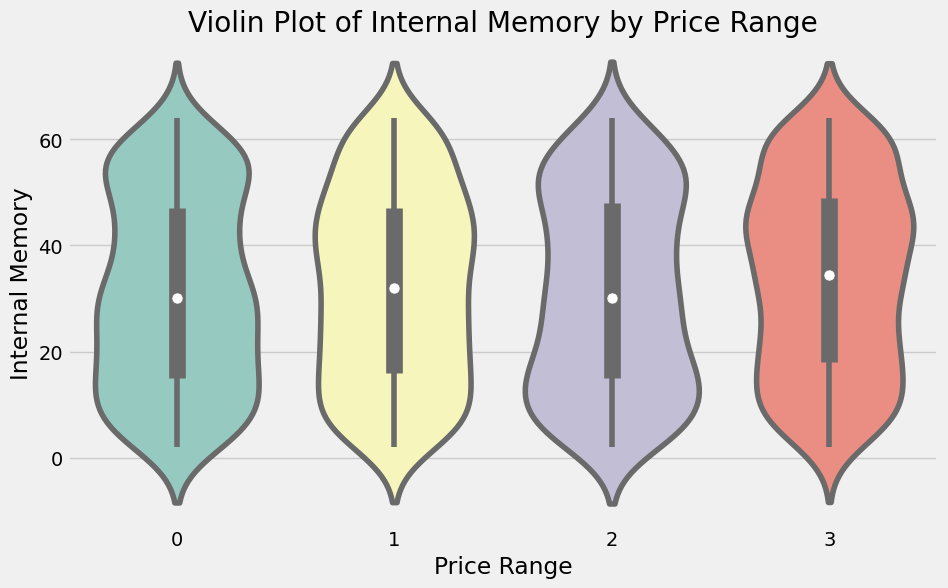

In [13]:
#violin plot of Internal Memory by price_range
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'int_memory', data = train, palette = 'Set3')
plt.title('Violin Plot of Internal Memory by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory')
plt.show()

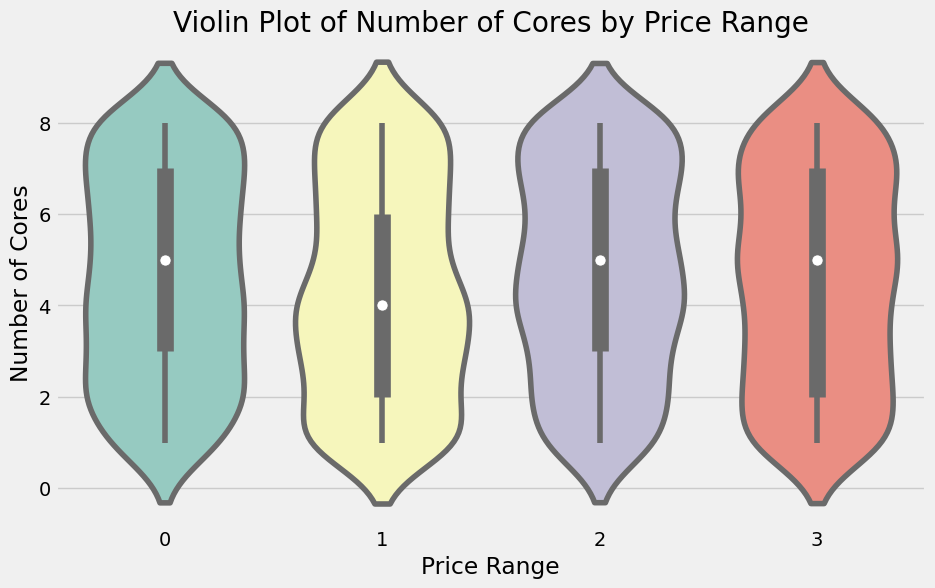

In [14]:
#violin plot of Number of Cores by price_range
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'n_cores', data = train, palette = 'Set3')
plt.title('Violin Plot of Number of Cores by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Cores')
plt.show()

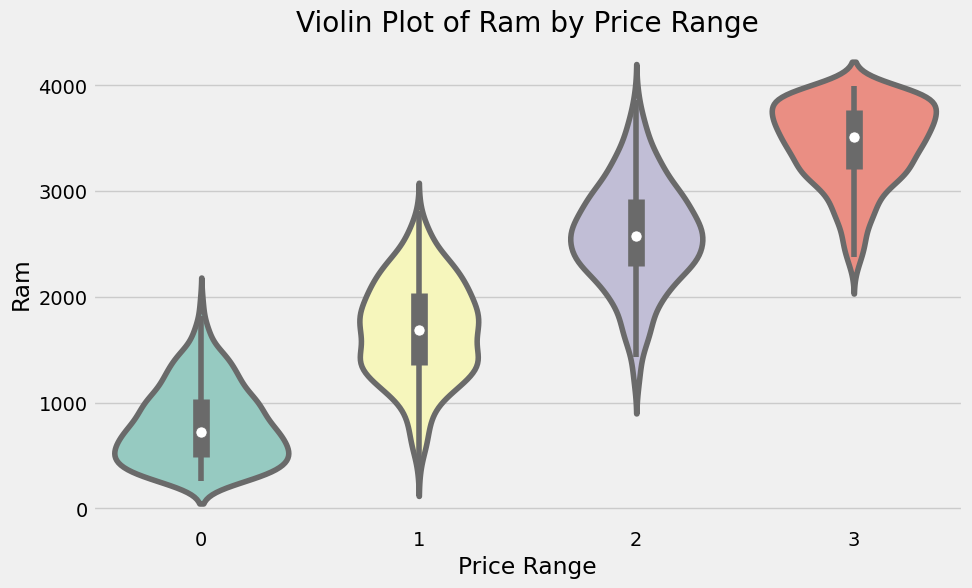

In [15]:
#violin plot of Ram by price_range
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'ram', data = train, palette = 'Set3')
plt.title('Violin Plot of Ram by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Ram')
plt.show()

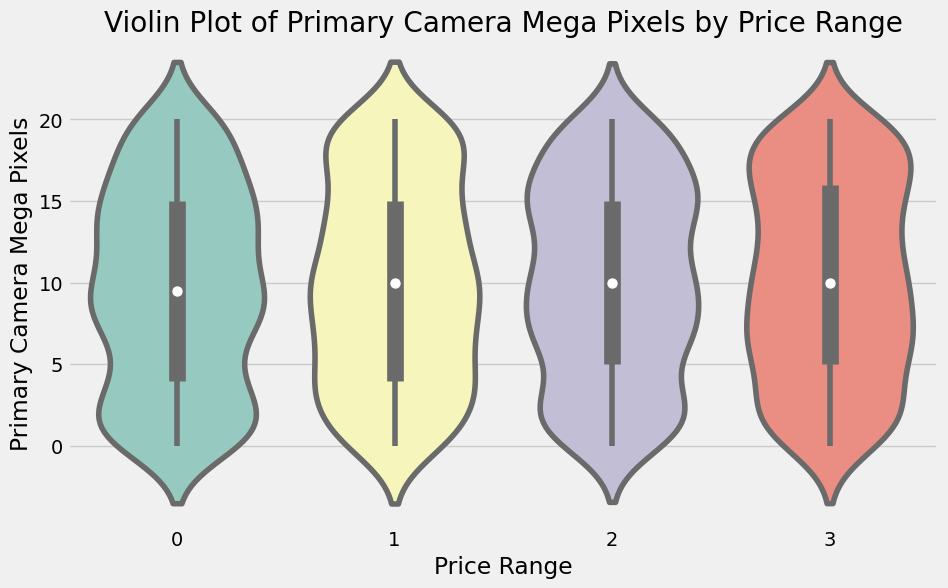

In [16]:
#violin plot of Primary Camera Mega Pixels by price_range
plt.figure(figsize = (10, 6))
sns.violinplot(x = 'price_range', y = 'pc', data = train, palette = 'Set3')
plt.title('Violin Plot of Primary Camera Mega Pixels by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Primary Camera Mega Pixels')
plt.show()

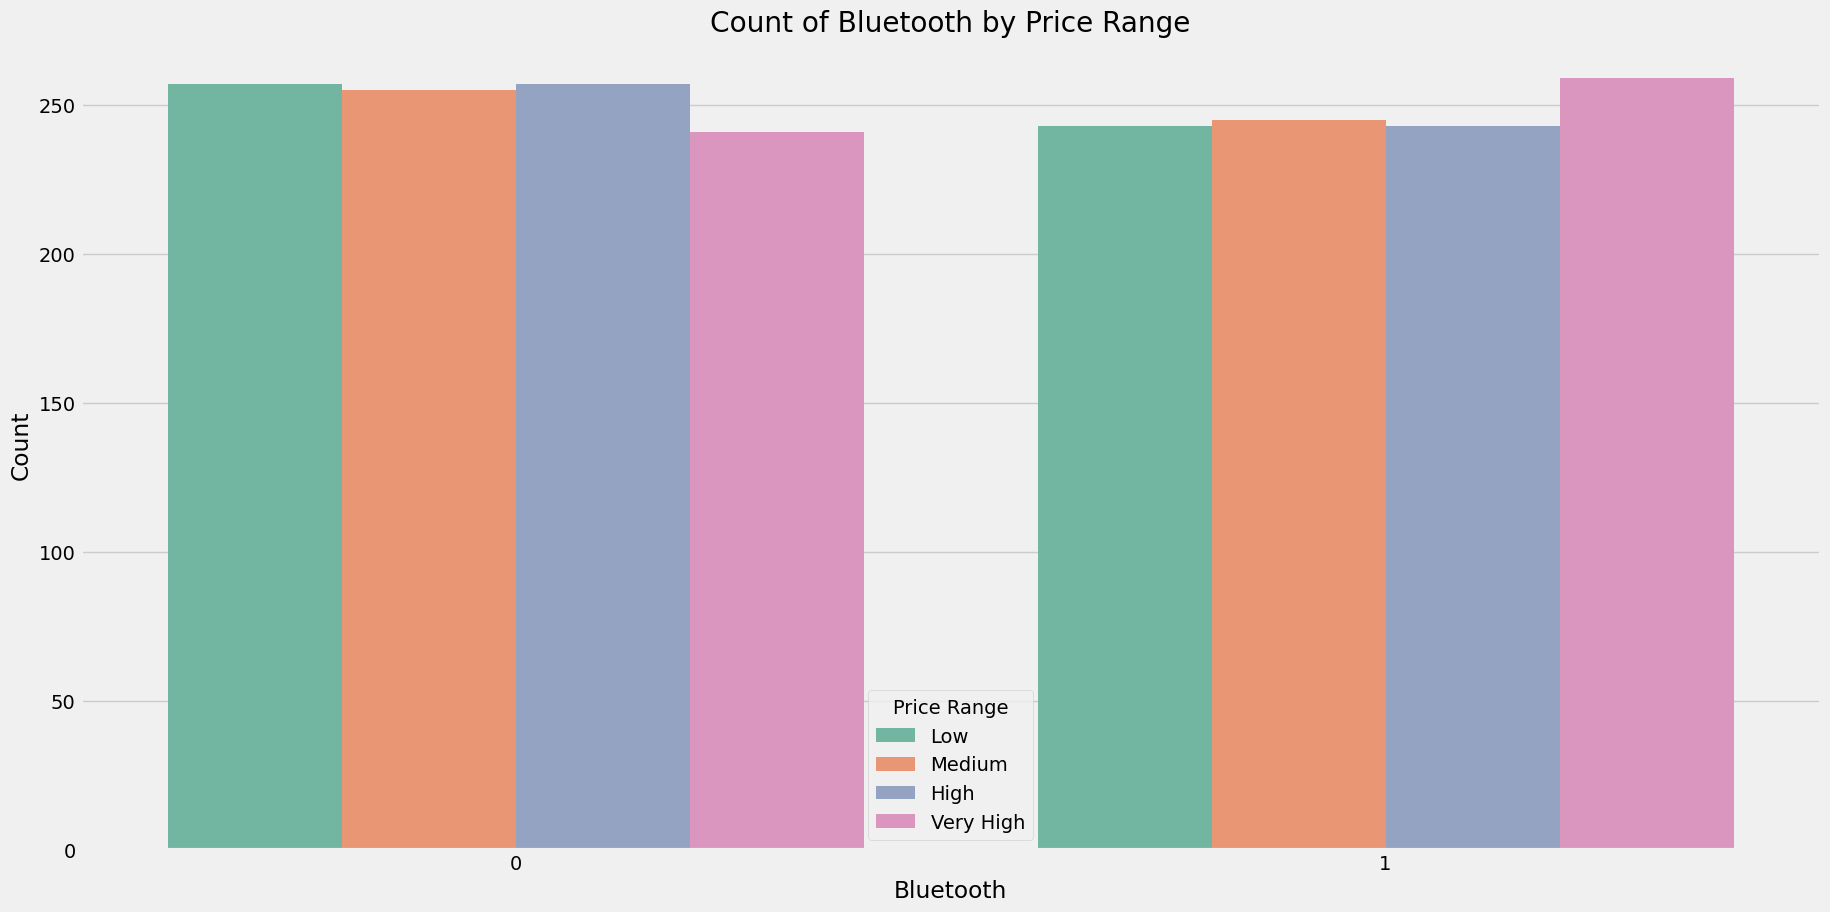

In [17]:
#count of Bluetooth
plt.figure(figsize = (20, 10))
sns.countplot(x = 'blue', hue = 'price_range', data = train, palette = 'Set2')
plt.title(f'Count of Bluetooth by Price Range')
plt.xlabel('Bluetooth')
plt.ylabel('Count')
plt.legend(title = 'Price Range', labels = ['Low', 'Medium', 'High', 'Very High'])

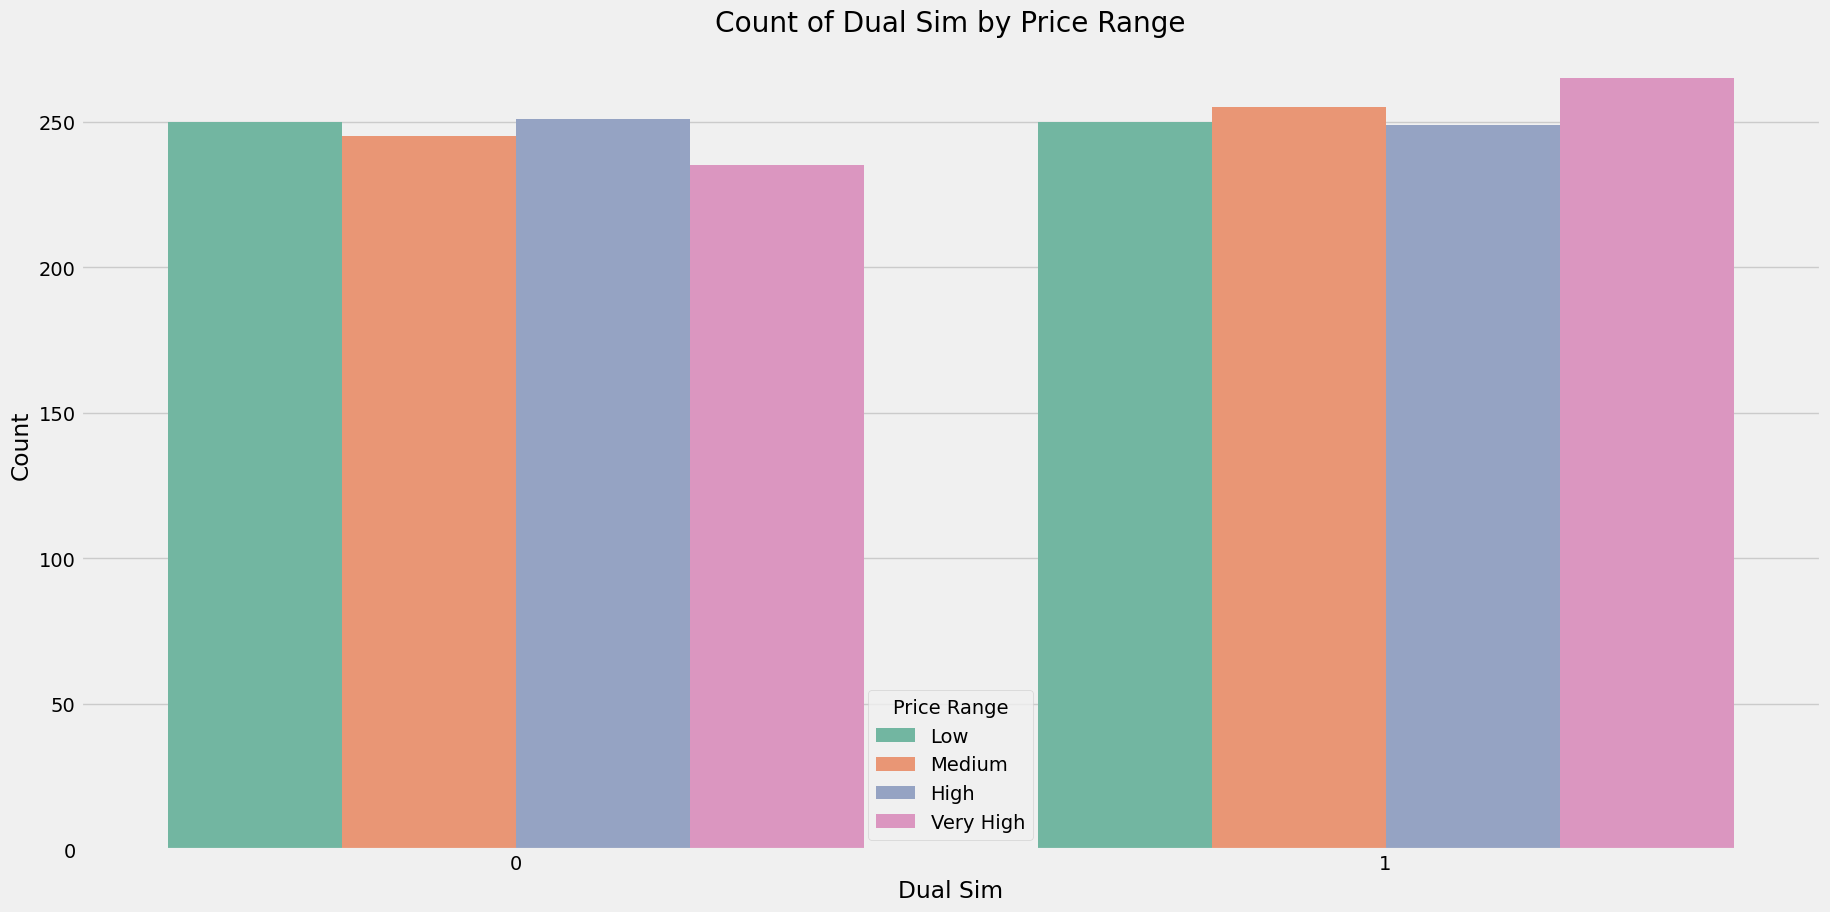

In [18]:
#count of Dual Sim
plt.figure(figsize = (20, 10))
sns.countplot(x = 'dual_sim', hue = 'price_range', data = train, palette = 'Set2')
plt.title(f'Count of Dual Sim by Price Range')
plt.xlabel('Dual Sim')
plt.ylabel('Count')
plt.legend(title = 'Price Range', labels = ['Low', 'Medium', 'High', 'Very High'])

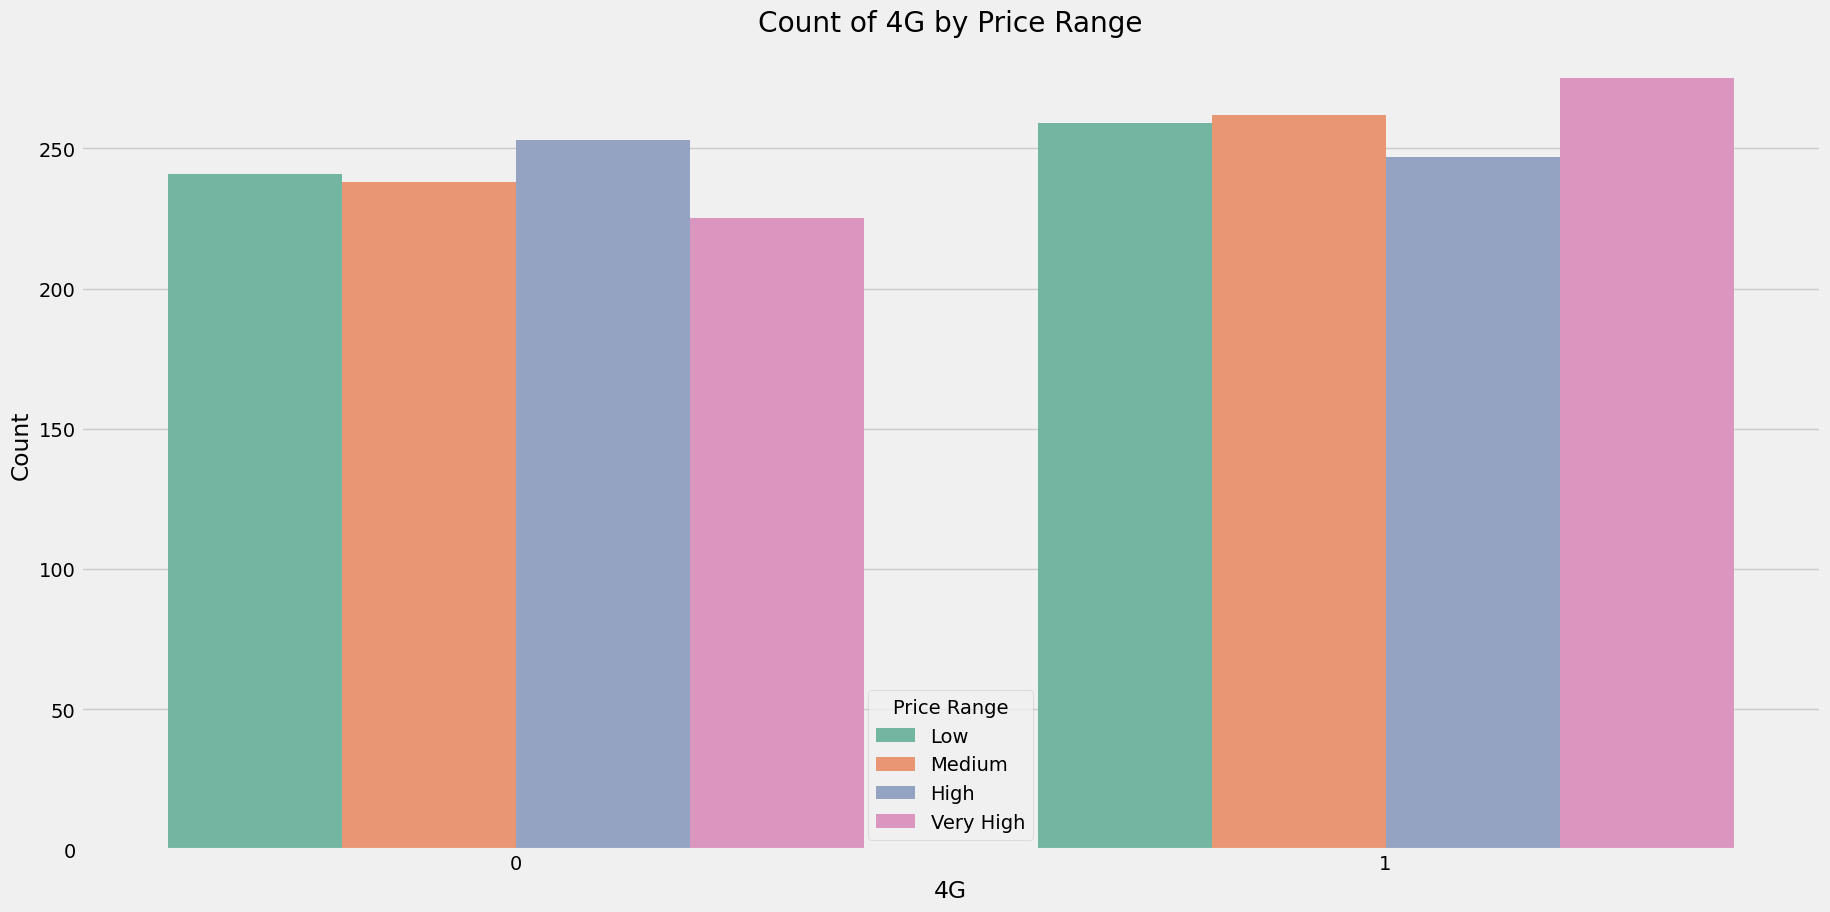

In [19]:
#count of 4G
plt.figure(figsize = (20, 10))
sns.countplot(x = 'four_g', hue = 'price_range', data = train, palette = 'Set2')
plt.title(f'Count of 4G by Price Range')
plt.xlabel('4G')
plt.ylabel('Count')
plt.legend(title = 'Price Range', labels = ['Low', 'Medium', 'High', 'Very High'])

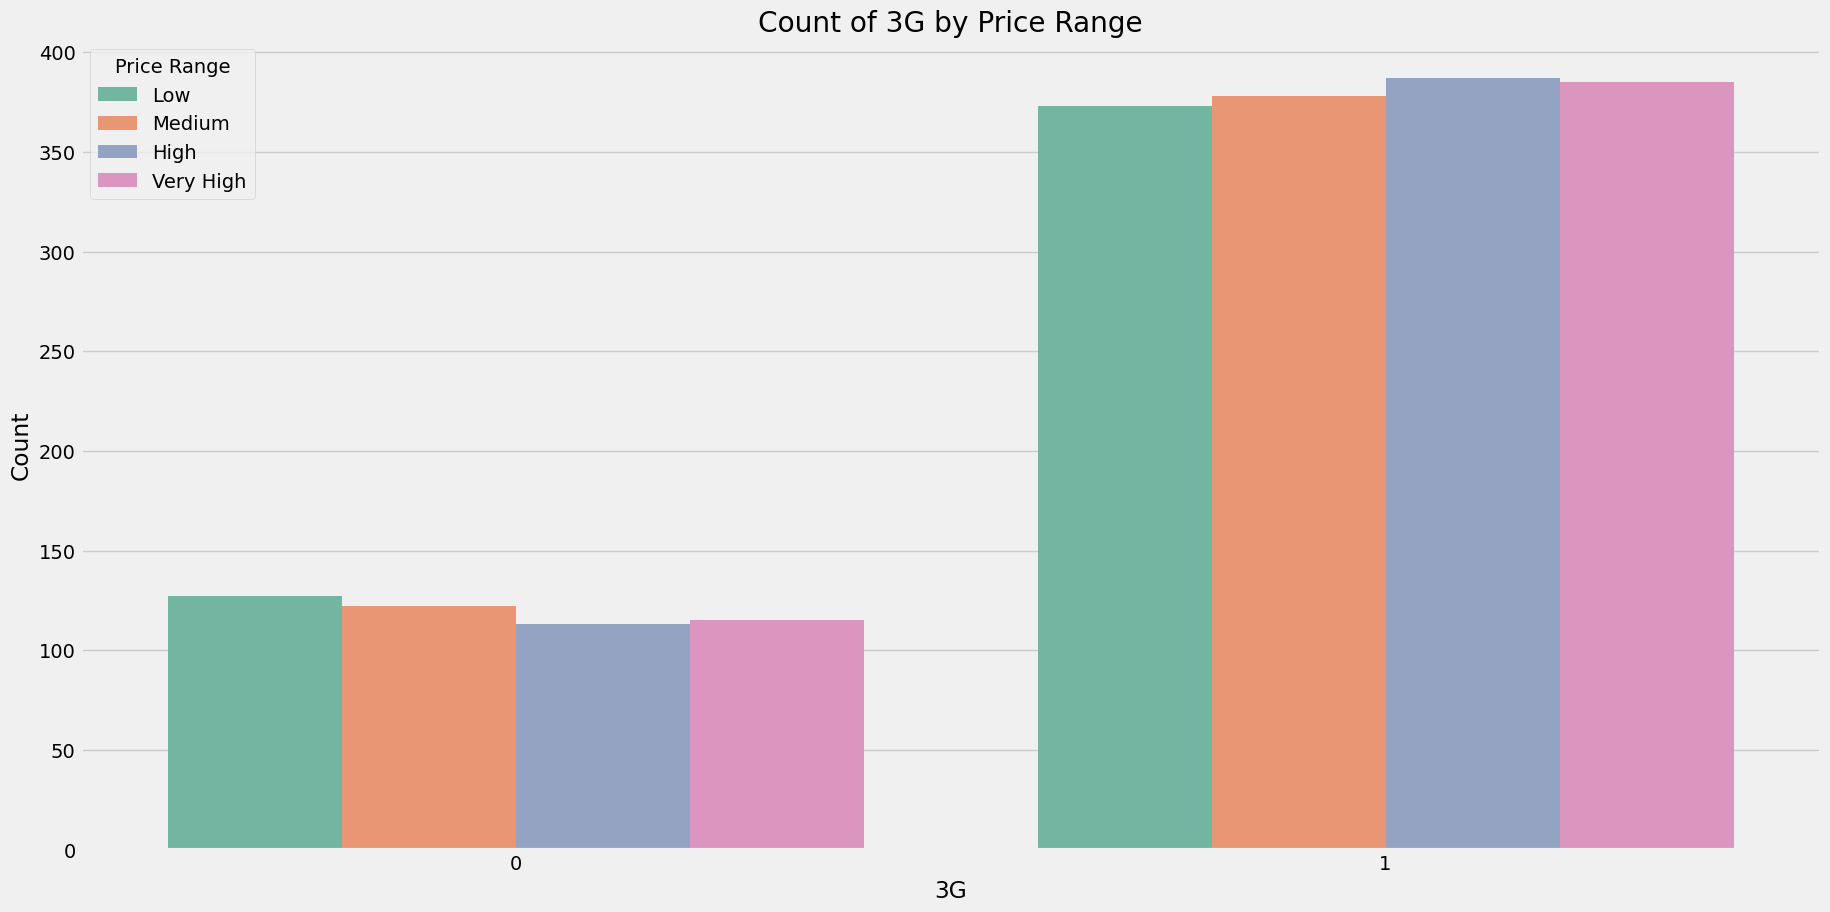

In [20]:
#count of 3G
plt.figure(figsize = (20, 10))
sns.countplot(x = 'three_g', hue = 'price_range', data = train, palette = 'Set2')
plt.title(f'Count of 3G by Price Range')
plt.xlabel('3G')
plt.ylabel('Count')
plt.legend(title = 'Price Range', labels = ['Low', 'Medium', 'High', 'Very High'])

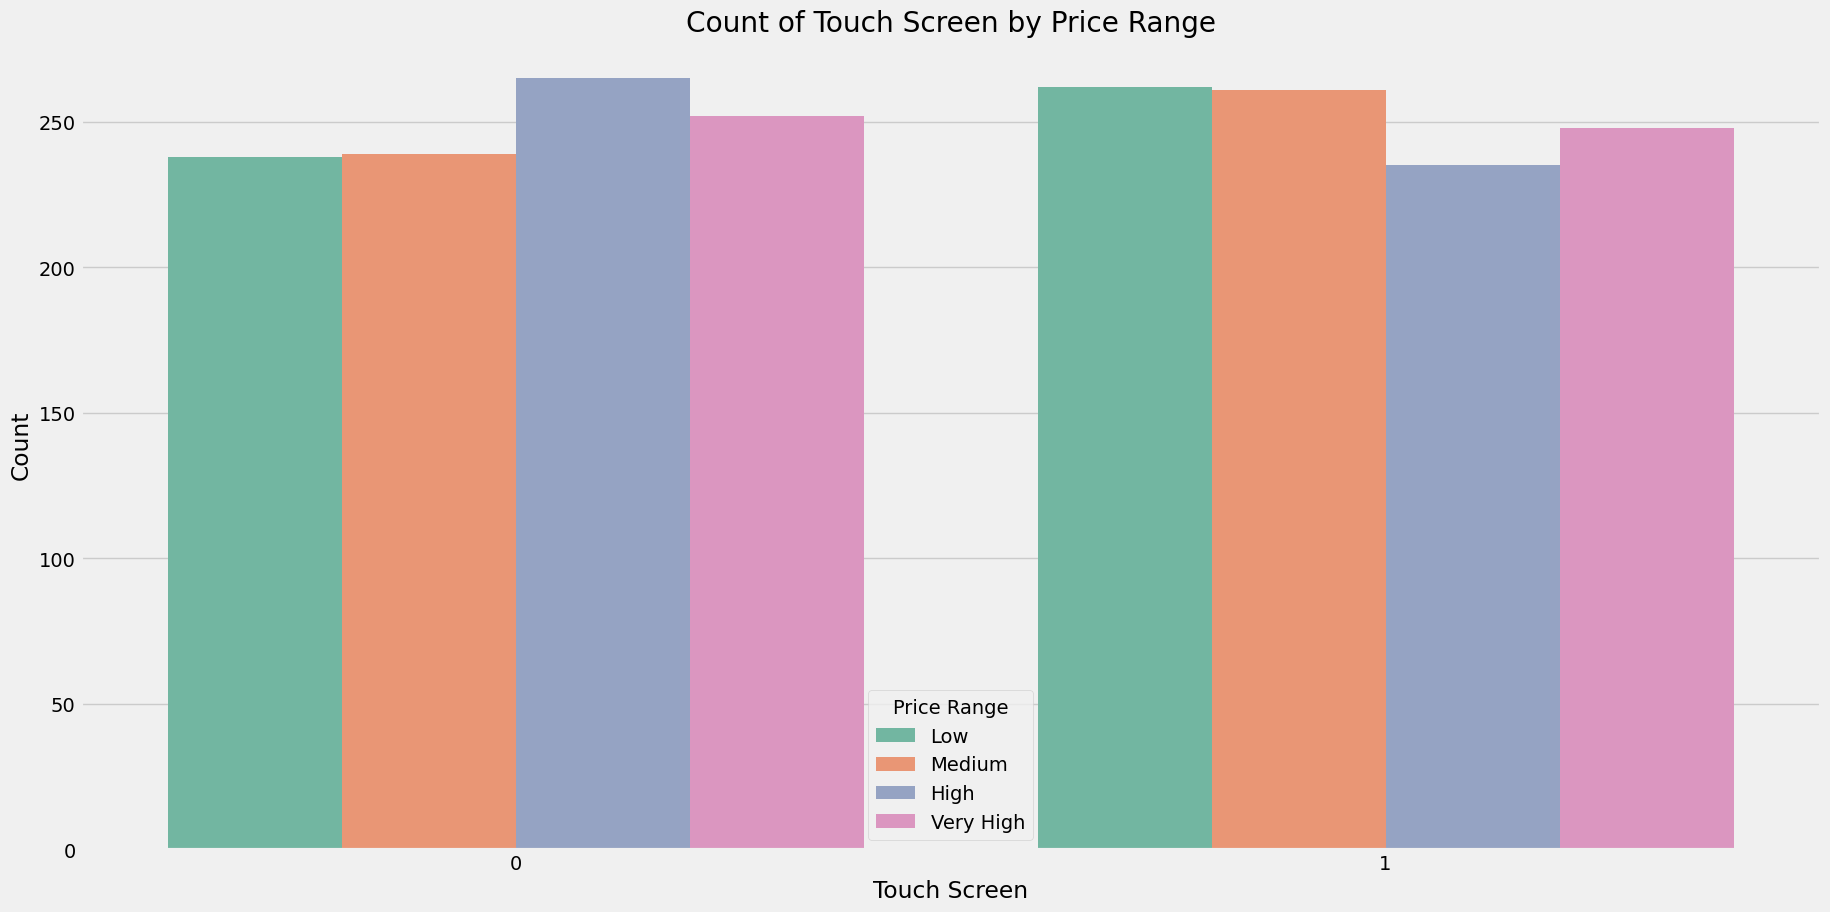

In [21]:
#count of Touch Screen
plt.figure(figsize = (20, 10))
sns.countplot(x = 'touch_screen', hue = 'price_range', data = train, palette = 'Set2')
plt.title(f'Count of Touch Screen by Price Range')
plt.xlabel('Touch Screen')
plt.ylabel('Count')
plt.legend(title = 'Price Range', labels = ['Low', 'Medium', 'High', 'Very High'])

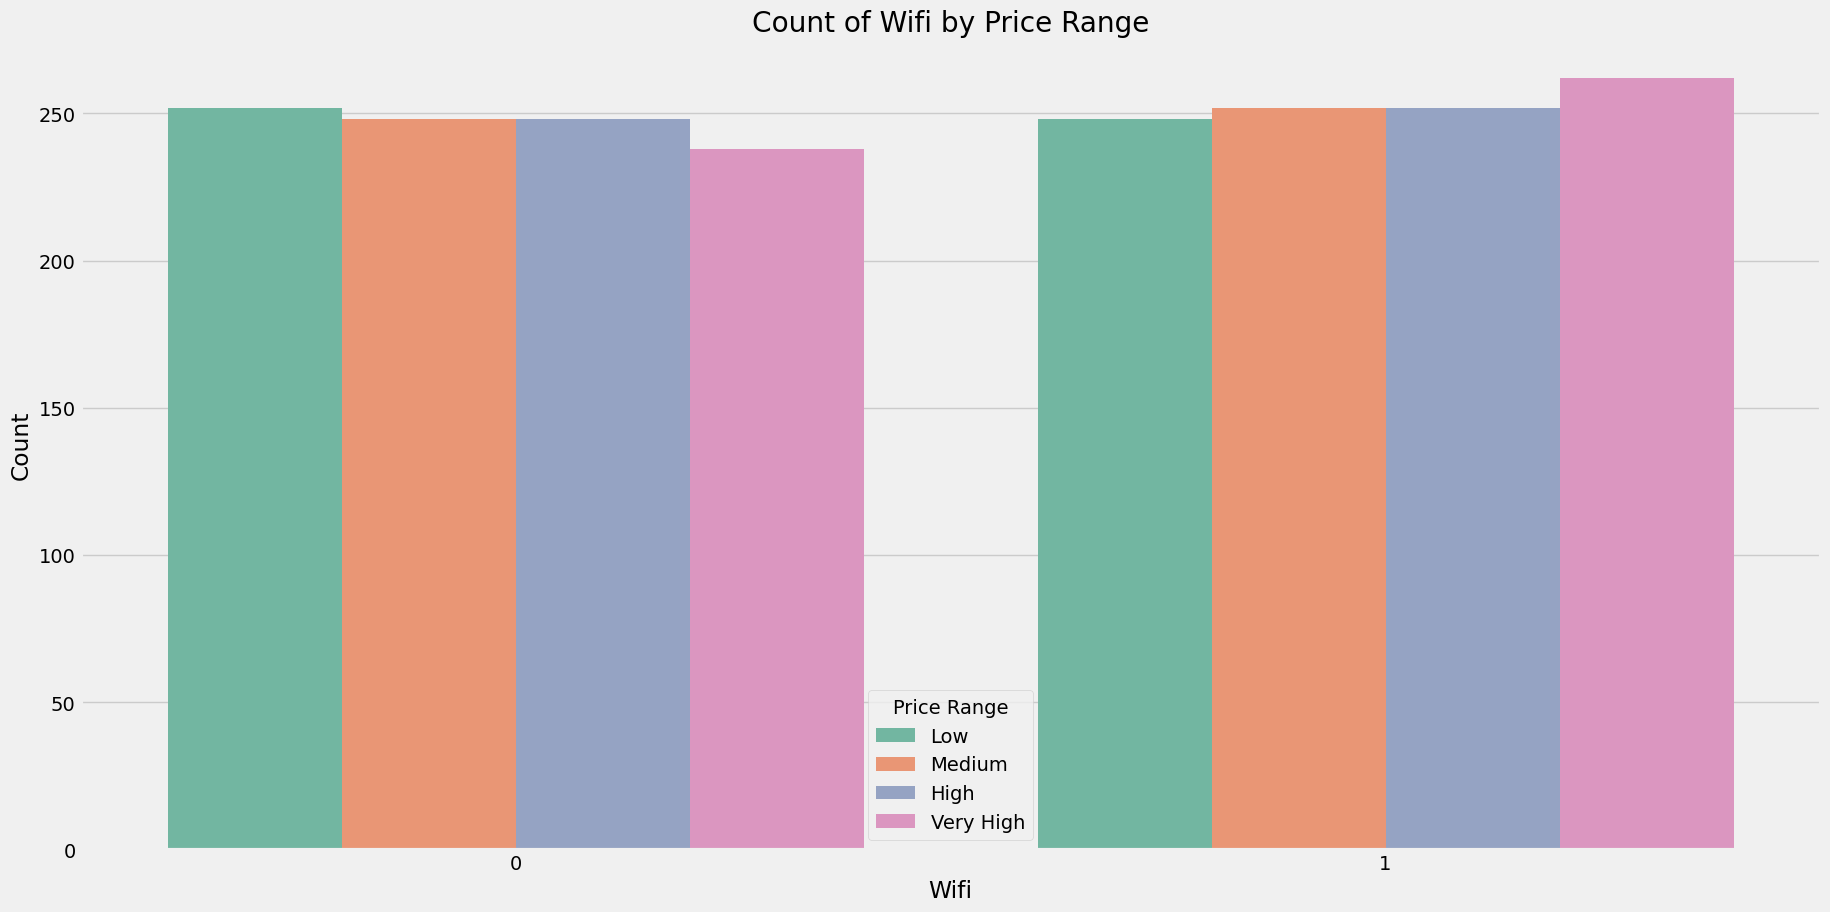

In [22]:
#count of Wifi
plt.figure(figsize = (20, 10))
sns.countplot(x = 'wifi', hue = 'price_range', data = train, palette = 'Set2')
plt.title(f'Count of Wifi by Price Range')
plt.xlabel('Wifi')
plt.ylabel('Count')
plt.legend(title = 'Price Range', labels = ['Low', 'Medium', 'High', 'Very High'])

# Data Pre-Processing

In [23]:
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to train and test data
columns_to_scale = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w']
scaler = MinMaxScaler()
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])
test[columns_to_scale] = scaler.fit_transform(test[columns_to_scale])

# Modelling

In [24]:
#split data into features and target
X = train.drop(columns = ['price_range'])
y = train['price_range']

#split train dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#instantiate classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models and generate classification reports
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    report = classification_report(y_val, y_pred)
    print(f'{name} Classification Report:\n{report}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       105
           1       0.75      0.81      0.78        91
           2       0.79      0.72      0.75        92
           3       0.89      0.90      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       105
           1       0.88      0.88      0.88        91
           2       0.81      0.86      0.83        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400


K-Nearest Neighbors Classification Report:
           

In [25]:
#train the best model on the entire training dataset (including both training and validation sets)
best_model = LogisticRegression(max_iter=1000, multi_class='multinomial')
best_model.fit(X, y)

#make predictions on test dataset and add 'predicted_price_range' column for the predictions
test_predictions = best_model.predict(test)
test['predicted_price_range'] = test_predictions

In [26]:
#test dataset with predictions column
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,predicted_price_range
0,0.362241,1,0.52,1,0.736842,0,0.048387,0.000000,0.941667,0.285714,0.80,0.118511,0.608550,0.862319,0.500000,0.388889,0,1,0,3
1,0.227485,1,0.00,1,0.210526,1,0.951613,0.777778,0.925000,0.571429,0.60,0.391190,0.237809,0.974772,0.071429,0.000000,1,0,0,3
2,0.871915,1,0.92,0,0.052632,0,0.403226,0.888889,0.883333,0.285714,0.20,0.665967,0.577822,0.572464,0.857143,0.555556,0,1,1,2
3,0.697799,0,0.00,1,0.947368,1,0.370968,0.444444,0.133333,1.000000,1.00,0.154693,0.835671,0.974235,0.357143,0.000000,1,1,0,3
4,0.623082,0,0.36,0,0.578947,1,0.758065,0.444444,0.233333,0.714286,0.90,0.392764,0.206413,0.405260,0.714286,0.444444,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.800534,1,0.56,0,0.000000,1,0.838710,0.444444,0.750000,0.857143,0.85,0.337703,0.275217,0.498658,0.642857,0.444444,1,1,0,2
996,0.072715,0,0.52,1,0.000000,0,0.177419,0.888889,0.883333,0.428571,0.10,0.604090,0.755511,0.448202,0.214286,0.055556,0,1,1,1
997,0.456971,0,0.36,0,0.052632,1,0.096774,0.444444,0.000000,0.000000,0.60,0.250131,0.216433,0.257649,0.000000,0.000000,1,0,0,0
998,0.689126,1,0.00,1,0.000000,0,0.774194,0.333333,0.758333,0.142857,0.60,0.019927,0.221109,0.602791,0.714286,0.611111,0,1,0,2
